In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import re
import unidecode
from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv('TRABAJOPOLIS_FEB2019.csv',encoding='latin-1', sep=",")

In [3]:
df

,Nombre_Empresa,Id_Empleo,Ciudad,Categoria,Sueldo,Publicado,Vencimiento,Descripcion,Nombre_cargo,Enlace
0,Empresa de Servicios a Nivel Nacional,717052,"Sucre, Bolivia","Administración y Oficina,Dirección y Gerencia",No Declarado,05 Febrero 2019,07 Marzo 2019,importante empresa comercial busca incorporar ...,Coordinador(a) de Sucursal - Sucre,https://www.trabajopolis.bo/oferta-de-trabajo-...
1,Digital Tv Cable,717036,"Santa Cruz de la Sierra, Bolivia","Administración y Oficina,Atención al Cliente",Dependiendo de la Experiencia,05 Febrero 2019,07 Marzo 2019,digital tv cable internet esta buscando talen...,COORDINADOR (A) DE CALL CENTER Y ATC,https://www.trabajopolis.bo/oferta-de-trabajo-...
2,Electro Hogar S.R.L.,717026,"Santa Cruz de la Sierra, Bolivia",Administración y Oficina,De Bs. 2.060 a Bs. 2.999,05 Febrero 2019,07 Marzo 2019,secretaria recepcionista formacion conocimien...,Secretaria Recepcionista,https://www.trabajopolis.bo/oferta-de-trabajo-...
3,Cooperativa de Ahorro y Crédito Abierta Jesús ...,717041,"Sucre, Bolivia",Administración y Oficina,No Declarado,05 Febrero 2019,07 Marzo 2019,ejecutivo de negociosede chuquisacaformacionfo...,Ejecutivo(a) de Negocio - Chuquisaca,https://www.trabajopolis.bo/oferta-de-trabajo-...
4,Canedo Strampfer Consultores SRL,716469,"Cochabamba, Bolivia",Arquitectura,Negociable,05 Febrero 2019,07 Marzo 2019,arquitectofunciones elaboracion de planos calc...,Arquitecto(a),https://www.trabajopolis.bo/oferta-de-trabajo-...
...,...,...,...,...,...,...,...,...,...,...
9391,Banco Mercantil Santa Cruz S.A.,789027,"Santa Cruz de la Sierra, Bolivia","AtenciÃ³n al Cliente,Banca y Finanzas",No Declarado,26 Agosto 2019,25 Septiembre 2019,cajero santa cruz ref 3219 si te apasiona la ...,Cajero(a) - Santa Cruz (Montero),https://www.trabajopolis.bo/oferta-de-trabajo-...
9392,Importante Empresa Industrial,789024,"La Paz, Bolivia",Otros,No Declarado,26 Agosto 2019,25 Septiembre 2019,empresa lider requiere incorporar a su equipo ...,Encargado(a) de VehÃ­culos,https://www.trabajopolis.bo/oferta-de-trabajo-...
9393,Constructora Lopez & Zambrana Ltda.,779551,"Santa Cruz de la Sierra, Bolivia",InformÃ¡tica,Dependiendo de la Experiencia,26 Agosto 2019,25 Septiembre 2019,empresa en el rubro de la construccion necesit...,Programador(a) Web PHP / App MÃ³viles - Santa ...,https://www.trabajopolis.bo/oferta-de-trabajo-...
9394,Opal Ltda.,788735,"Santa Cruz de la Sierra, Bolivia",AdministraciÃ³n y Oficina,No Declarado,26 Agosto 2019,23 Septiembre 2019,opal ltda empresa lider en distribucion de beb...,Auxiliar de TesorerÃ­a - Santa Cruz,https://www.trabajopolis.bo/oferta-de-trabajo-...


In [4]:
df.Id_Empleo.unique().shape

(5389,)

In [5]:
df_new = df.drop_duplicates(subset ="Id_Empleo") 

In [6]:
df_new.set_index('Id_Empleo', verify_integrity = True, inplace = True)

In [7]:
df_new['Publicado'].value_counts()

11 Enero 2019      67
08 Enero 2019      60
04 Febrero 2019    60
09 Agosto 2019     60
18 Enero 2019      56
                   ..
17 Febrero 2019     1
24 Marzo 2019       1
27 Enero 2019       1
28 Abril 2019       1
24 Febrero 2019     1
Name: Publicado, Length: 182, dtype: int64

In [8]:
df_new['Sueldo'].value_counts()

No Declarado                      4149
De Bs. 3.000 a Bs. 3.999           248
Dependiendo de la Experiencia      246
De Bs. 2.060 a Bs. 2.999           203
Negociable                         159
De Bs. 2.122 a Bs. 2.999           129
De Bs. 4.000 a Bs. 4.999            92
De Bs. 5.000 a Bs. 5.999            50
De Bs. 6.000 a Bs. 6.999            30
De Bs. 10.000 a Bs. 14.999          27
De Bs. 7.000 a Bs. 7.999            18
De Bs. 8.000 a Bs. 8.999            17
De Bs. 9.000 a Bs. 9.999            15
De Bs. 15.000 a Bs. 19.999           4
Mayores a Bs. 20.000                 2
Name: Sueldo, dtype: int64

In [9]:
df_new['Nombre_Empresa'].value_counts().head(10)

Importante Empresa                          186
INSTITUCION DE INTERMEDIACION FINANCIERA    146
Banco Fassil - Trabaje con Nosotros         135
Banco Pyme Ecofuturo S.A.                   131
Empresa Comercial                            83
Importante Empresa Comercial                 81
Importante Empresa Industrial                68
Empresa Industrial                           67
Univida S.A.                                 60
INDUSTRIAS FERROTODO LTDA.                   56
Name: Nombre_Empresa, dtype: int64

In [10]:
df_new['Ciudad'].value_counts()

Santa Cruz de la Sierra, Bolivia    3104
La Paz, Bolivia                     1181
Cochabamba, Bolivia                  636
Tarija, Bolivia                      103
El Alto, Bolivia                     100
Oruro, Bolivia                        67
Sucre, Bolivia                        67
PotosÃ­, Bolivia                      61
Trinidad, Bolivia                     28
Otra Ciudad de Bolivia, Bolivia       20
Potosí, Bolivia                       17
Cobija, Bolivia                        5
Name: Ciudad, dtype: int64

In [11]:
def column2text(feature):
    new_list = []
    # Separate by colon
    for element in feature:
        if ',' in element:
            tmp = element.split(',')
            new_list.append(tmp[0].rstrip())
            new_list.append(tmp[1].rstrip())
        #else:
         #   new_categorias.append(element)
    # Merge all elements of list into a text        
    txt = ''
    for element in new_list:
        txt = txt + element + ' '
    # Clean text
    text = txt.lower().replace('\n','') #Get items without \n
    text = re.sub("(\(\w+\))", '', text) #Delete parenthesis
    #text = unidecode.unidecode(text) #Delete accents
    #text = re.sub('[^A-Za-z0-9\s]','',text) #Delete anything but letters, numbers and spaces
    clean_text = text.replace('  ', ' ')
    return clean_text

In [12]:
df_new['Nombre_cargo'].value_counts().head()

Ejecutivo(a) de Ventas                 82
Auxiliar Contable                      61
Recepcionista                          35
Contador(a)                            35
Ejecutivo(a) de Ventas - Santa Cruz    35
Name: Nombre_cargo, dtype: int64

In [13]:
clean_text = column2text(df_new['Categoria'])

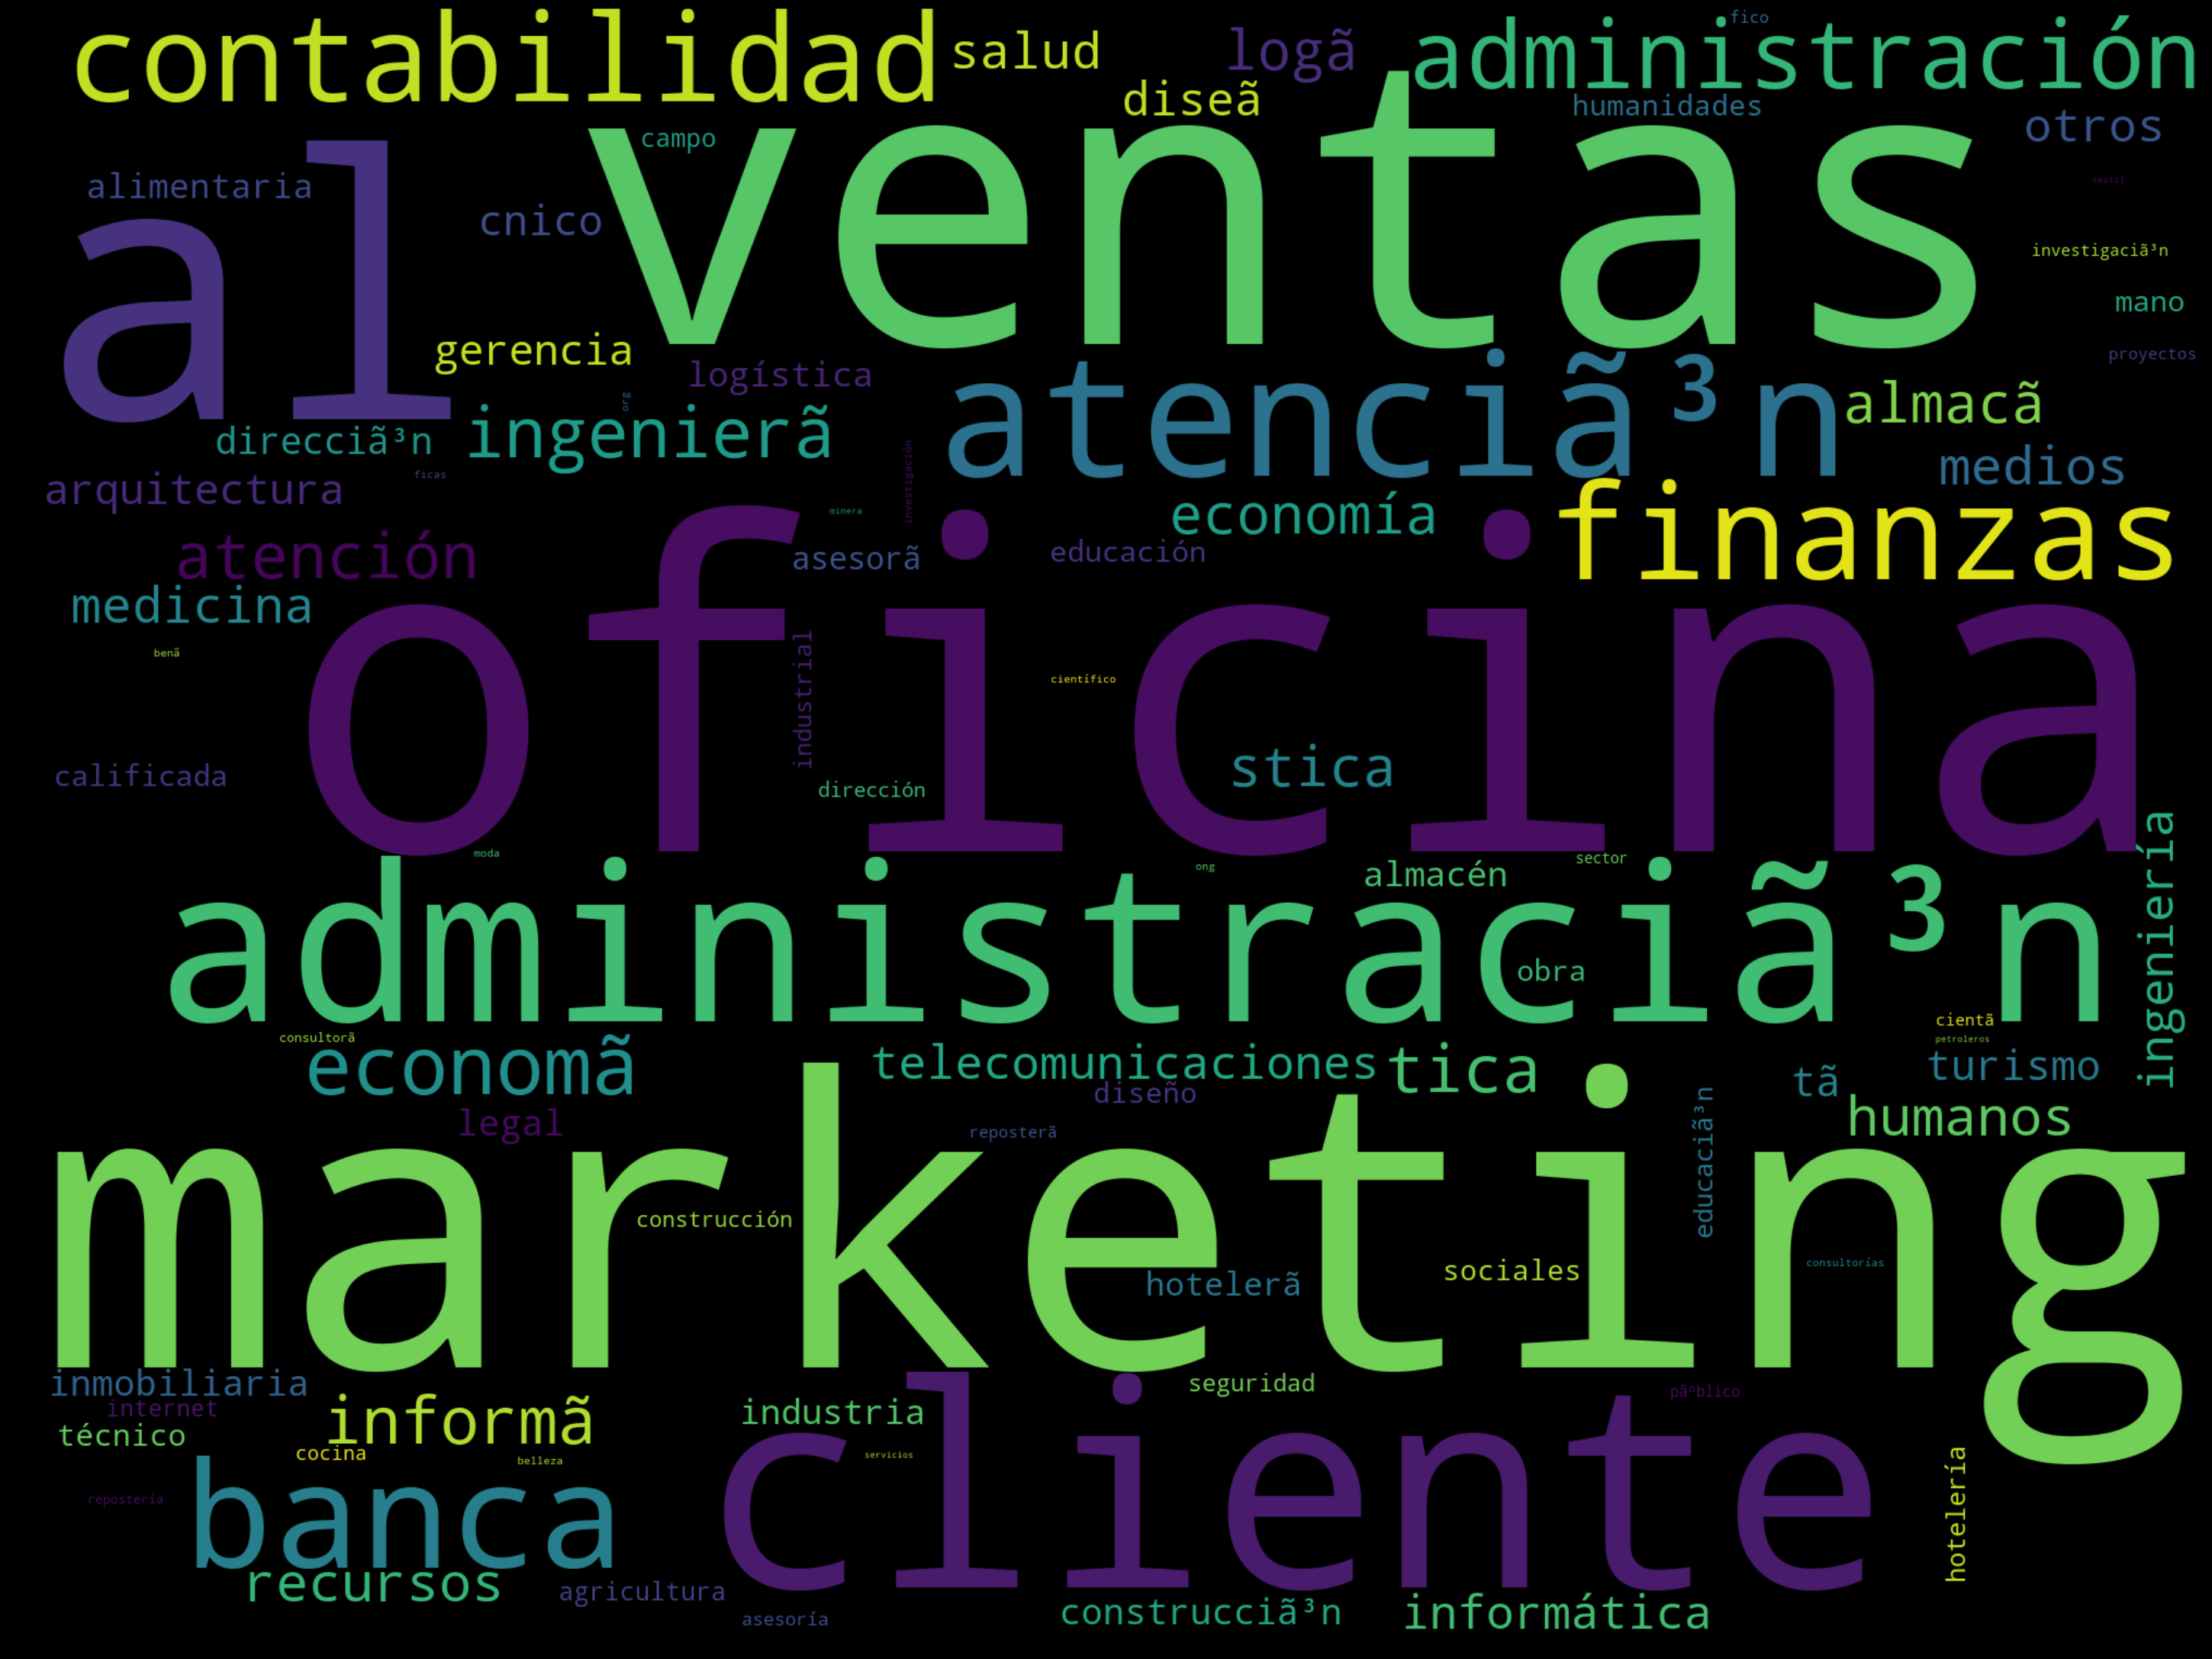

In [14]:
wordcloud = WordCloud(
    collocations=False,
    width = 2000,
    height = 1500,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(clean_text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [15]:
nombres_cargos = column2text(df_new['Nombre_cargo'])

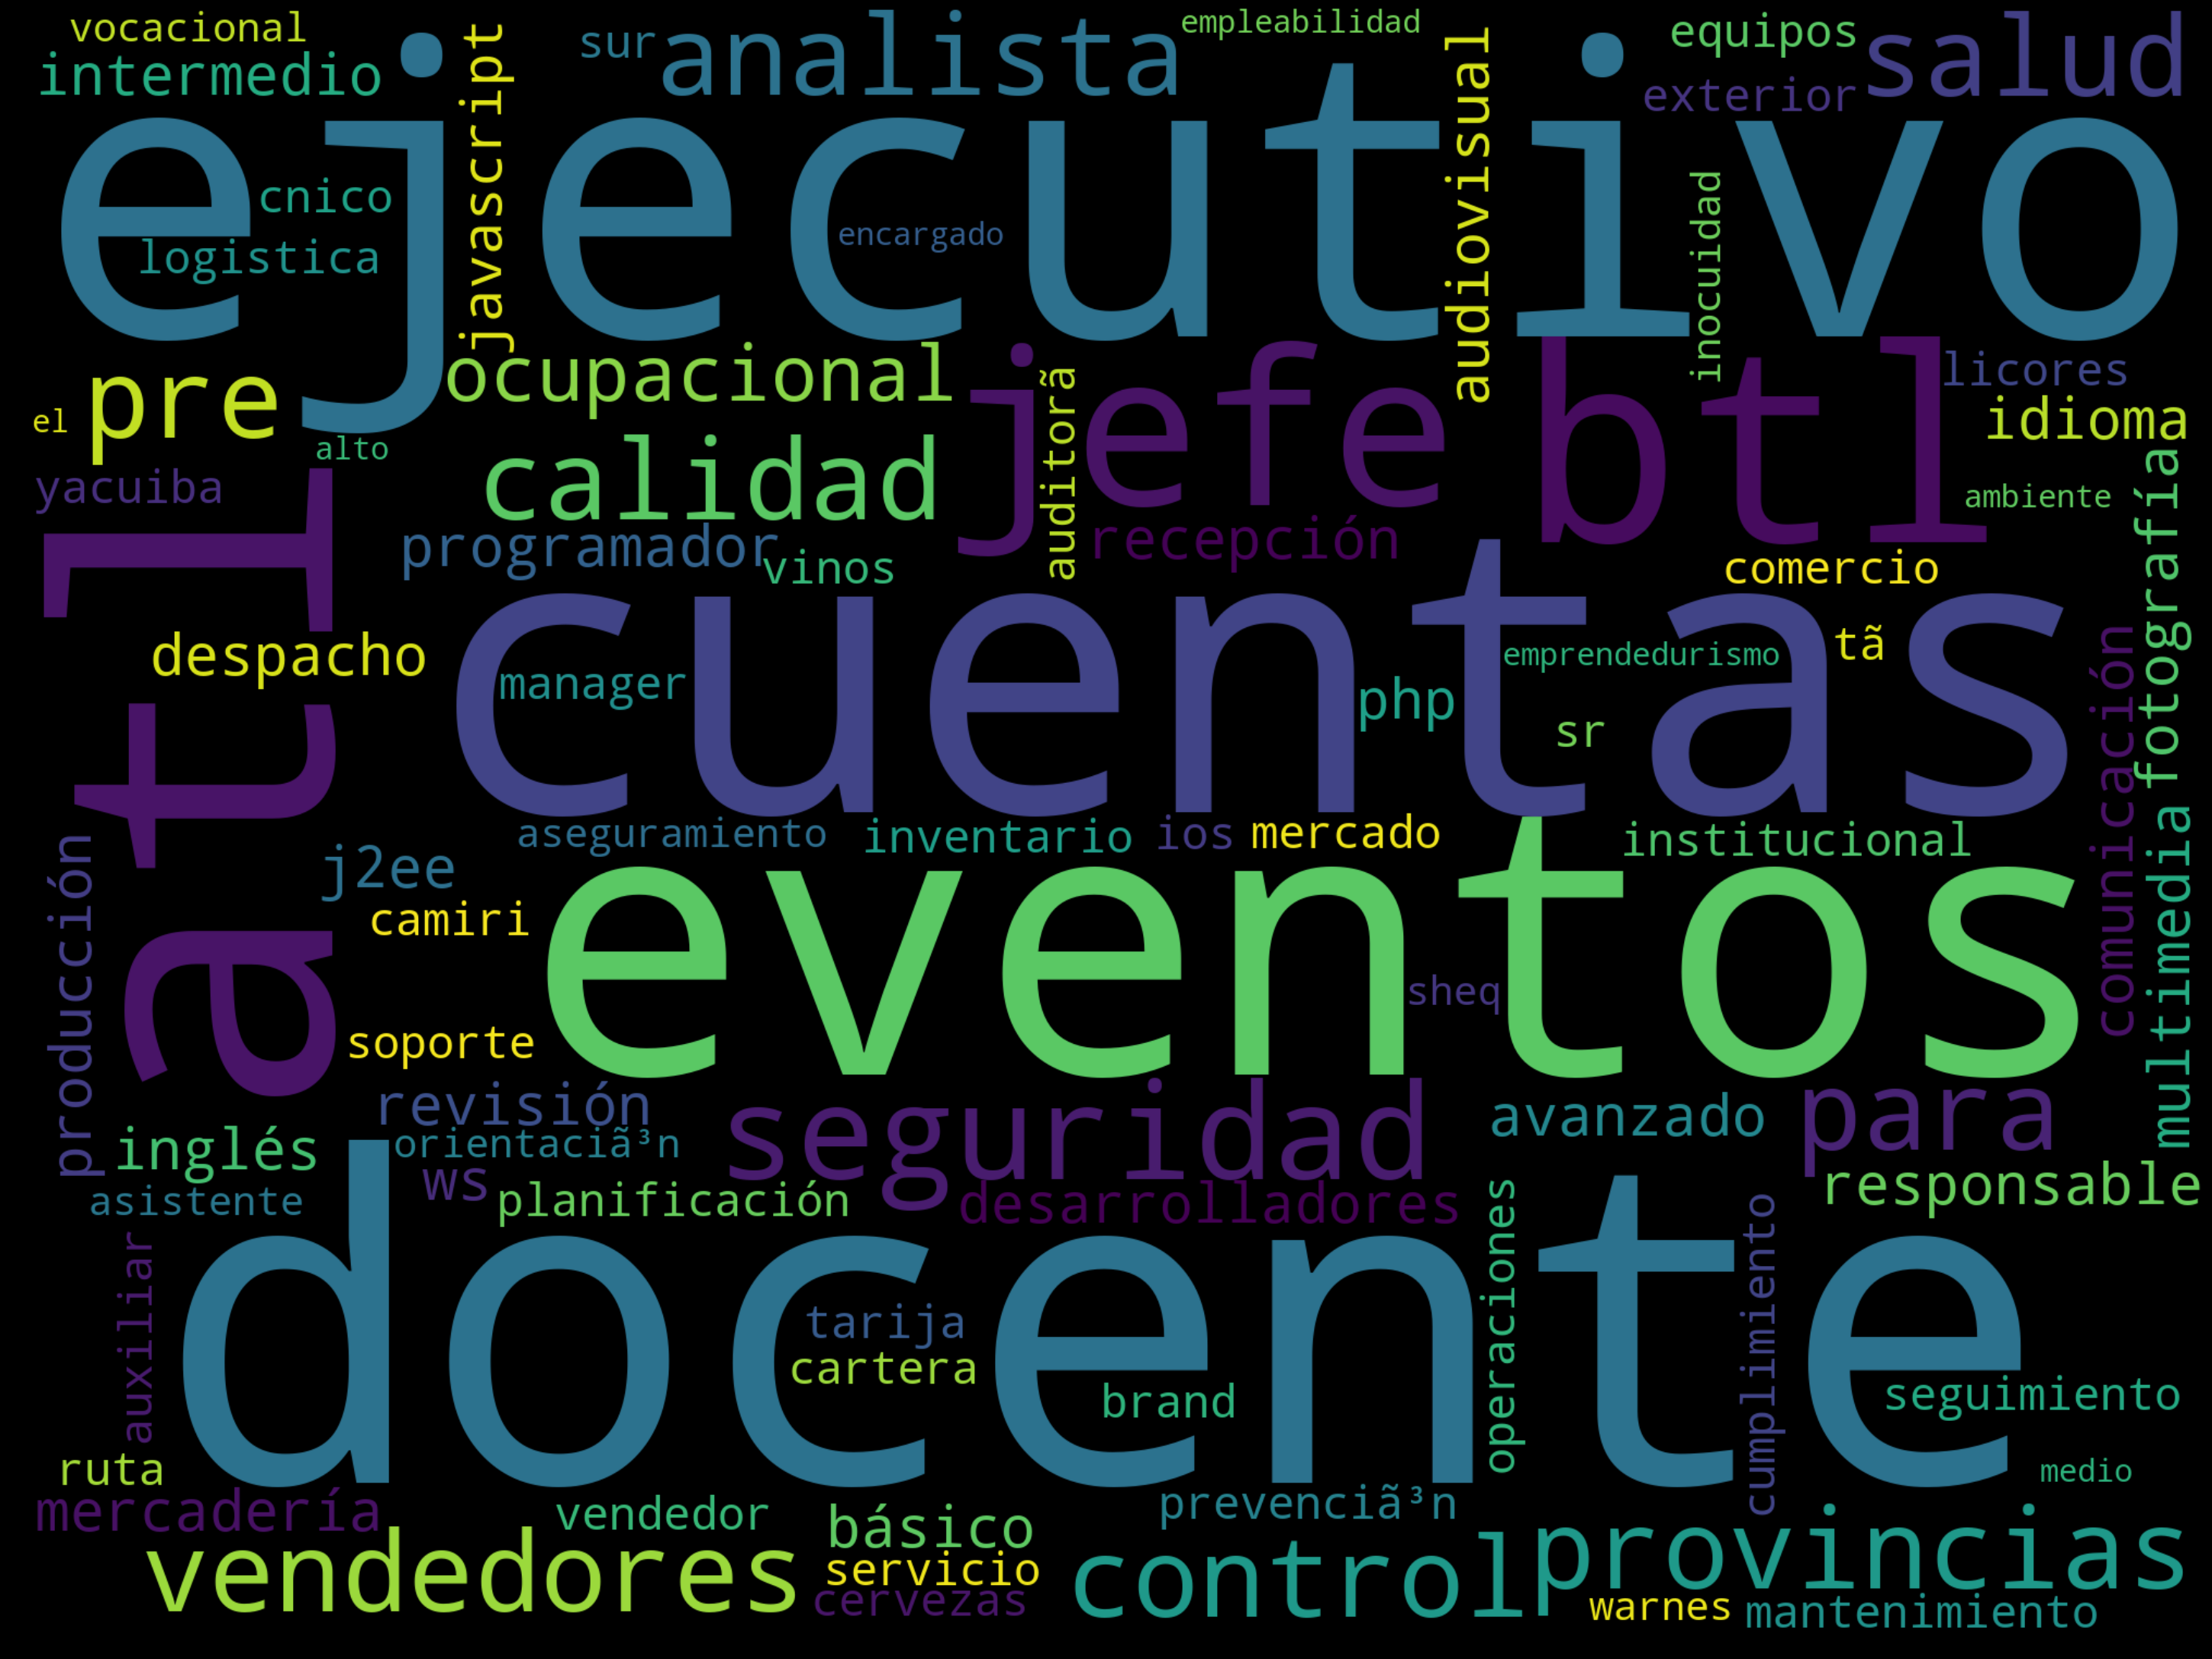

In [16]:
#set the stopwords list
stopwords= set(STOPWORDS)

#append new words to the stopwords list
new_words = {'de', 'al', 'santa', 'cruz', 'cochabamba', 'la', 'paz'}
new_stopwords=stopwords.union(new_words)

wordcloud = WordCloud(
    collocations=False,
    width = 2000,
    height = 1500,
    background_color = 'black',
    stopwords = new_stopwords).generate(str(nombres_cargos))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

ver qué dias publican más publicidad?
en qué mes?
de los informaticos, cuantos son en banca?
eliminar stopwords espanol

If informatica:
    descripcion = 
    wordCloud(descripcion)